<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-Version" data-toc-modified-id="This-Version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This Version</a></span></li><li><span><a href="#Current-Problems" data-toc-modified-id="Current-Problems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Current Problems</a></span></li><li><span><a href="#Todo:" data-toc-modified-id="Todo:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Todo:</a></span><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Bi-directionnal-problem" data-toc-modified-id="Bi-directionnal-problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bi-directionnal problem</a></span><ul class="toc-item"><li><span><a href="#Initialize" data-toc-modified-id="Initialize-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Initialize</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Vizualize-and-theoretical-solution" data-toc-modified-id="Vizualize-and-theoretical-solution-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Vizualize and theoretical solution</a></span><ul class="toc-item"><li><span><a href="#Axis-1-to-2" data-toc-modified-id="Axis-1-to-2-5.1.2.1"><span class="toc-item-num">5.1.2.1&nbsp;&nbsp;</span>Axis 1 to 2</a></span></li><li><span><a href="#Axis-2-to-1" data-toc-modified-id="Axis-2-to-1-5.1.2.2"><span class="toc-item-num">5.1.2.2&nbsp;&nbsp;</span>Axis 2 to 1</a></span></li></ul></li><li><span><a href="#Expected-solution" data-toc-modified-id="Expected-solution-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Expected solution</a></span></li></ul></li><li><span><a href="#Run" data-toc-modified-id="Run-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Run</a></span><ul class="toc-item"><li><span><a href="#Init-Graph" data-toc-modified-id="Init-Graph-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Init Graph</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analyze-output" data-toc-modified-id="Analyze-output-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Analyze output</a></span></li><li><span><a href="#oD" data-toc-modified-id="oD-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>oD</a></span></li></ul></li></ul></li><li><span><a href="#Understand-the-oscillations-around-0" data-toc-modified-id="Understand-the-oscillations-around-0-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Understand the oscillations around 0</a></span></li><li><span><a href="#LET-US-ANALYZE-THE-SIZE-OF-JUMPS-IN-FLOW-ON-THE-DUMMY-EDGE" data-toc-modified-id="LET-US-ANALYZE-THE-SIZE-OF-JUMPS-IN-FLOW-ON-THE-DUMMY-EDGE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>LET US ANALYZE THE SIZE OF JUMPS IN FLOW ON THE DUMMY EDGE</a></span><ul class="toc-item"><li><span><a href="#Dummy-edge-1-2p" data-toc-modified-id="Dummy-edge-1-2p-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dummy edge 1 2p</a></span></li></ul></li></ul></div>

# This Version

This version contains the use of the evolving bounds, for the first time

# Current Problems

# Todo:

- Include good vizualization of the total cost function (from previous MATLAB/Python work) in order to see what the theoretical solution is and to tune your parameters properly (You can use what you have already developed for the previous solution, stored in the vizualization folder)

- Find the good data strcutre to represent the flows over the graph

- Transform Graph into objects, to make it easier to use? 

- Stopping criterion for FW

- Introduce node potentials properly (one is the offset for the Demand function, the other one is the potential! 


- Include the vertex potential and the inverse demand shift: two different things!

## Notes


- interesting to note that the algorithm computes the right solution, also for rebalancers, but cannot fulfill it. 
- Actually there is nothing on 1-2p either, which means it does not really work...: THIS IS SOLVED, is was an initialization issue. Makes me confident that the other is also an initialization issue. Which makes sense. At each step, you have to act as if you know all the components (i.e. all the OD pairs)

- I think it is initialization, it has to be a feasible point. 
- BUT: what is a feasible point when your feasible set evolves over the iterations (essentially, OD pairs in this case)

- I don't really understand. What does the algorithm do, exactly? It seeks a minimum cost solution that has to respect certain constraints. But here, the constraints are implicit. Therefore, we have to make sure the constraints are always respected, otherwise it will assign zero flow even when there should be flow!! For instance, here, it avoids assigning to 1-R because it does not really need to, you see? 

- Don't forget: the capacities are a mirror for the ri_k
- think about proper initialization
- What is the correct way to think about flows? 1. should we split them in m and r? 2. In order to compute the ri_k, I am assuming we should put into it only the flow that goes onto the network (i.e. neglect all the edges that flow directly into dummy node). 
- it seemed like the thing stopped giving the right answer (8.xxx as soon as I introduced a change in the way the ri_k were computed)
- What is happening is the following: the ALPHA is good at the beginning (first iteration) but then it goes super small for some reason: it does not include the new suggestions.

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines_icu import *
from helpers_icu import *
import cvxpy as cp
from FW_icu import *

# Bi-directionnal problem

## Initialize 

### Parameters

In [2]:
#parameters
alpha=0.15
beta=4
POTENTIAL_SHIFT=90
INVERSE_DEMAND_SHIFT=80

ZC_EDGE=1

In [3]:
L_dum=10
#to adapt
#to be read from file if necessary
nodes_list=['1','2','2_p','R','1_p']
edge_list=[('1','2'),('2','1'),('2','2_p'),('1','R'),('1','2_p'),('1','1_p'),('2','1_p'),('2','R')]
k_list=[10,10,3,10,ZC_EDGE,2,ZC_EDGE,10] 
l_list=[10,10,1,L_dum,0,1,0,L_dum]
t_list=[10,10,10,10,ZC_EDGE,10,ZC_EDGE,10]
phi_list=[phi(l_list[i],t_list[i]) for i in range(len(l_list))]
is_negative=[0,0,1,0,0,1,0,0]

nodes_pots=[('2_p',POTENTIAL_SHIFT),('1_p',POTENTIAL_SHIFT)]

In [4]:
OD=dict()
N=10
OD[('1','2_p')]=N
OD[('2','R')]=N
OD[('2','1_p')]=N
OD[('1','R')]=N

print(OD)

{('1', '2_p'): 10, ('2', 'R'): 10, ('2', '1_p'): 10, ('1', 'R'): 10}


### Vizualize and theoretical solution

#### Axis 1 to 2

In [9]:
x_12=np.linspace(0,N,100)

C1=BPR(phi_list[0],x_12,k_list[0])
C2=-BPR(phi_list[2],x_12,k_list[2])+INVERSE_DEMAND_SHIFT
KK=C1-C2

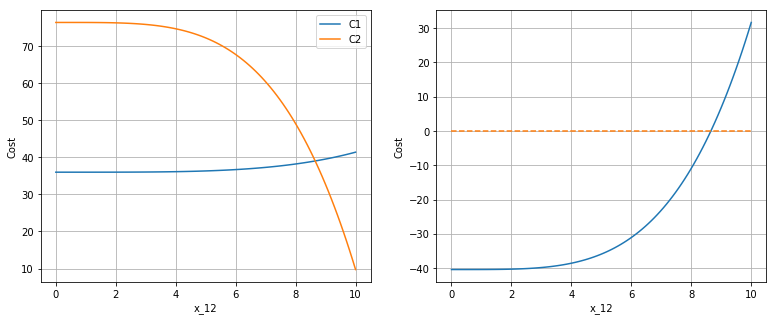

In [10]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_12,C1,label=("C1"))
plt.plot(x_12,C2,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_12,KK,label="Total Cost")
plt.plot(x_12,np.ones(x_12.shape)*0,'--')
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

Plot for illustration

In [11]:
C_T=BPR_int_val(phi_list[0],x_12,k_list[0])+BPR_int_val(phi_list[2],x_12,k_list[2])-INVERSE_DEMAND_SHIFT*x_12

Text(0, 0.5, 'Integral Cost')

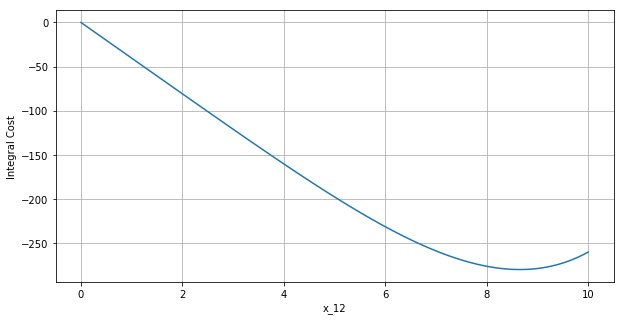

In [12]:
plt.figure(figsize=(10,5))
plt.plot(x_12,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

Compute the optimum with cvxpy

In [13]:
x_12=cp.Variable()
constraints=[x_12>=0,x_12<=10]

C_T=BPR_int(phi_list[0],x_12,k_list[0])+BPR_int(phi_list[2],x_12,k_list[2])-INVERSE_DEMAND_SHIFT*x_12
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value:", x_12.value)

optimal_inaccurate
optimal flow value: 8.649842980893967


#### Axis 2 to 1

In [14]:
x_21=np.linspace(0,N,100)

C1=BPR(phi_list[1],x_21,k_list[1])
C2=-BPR(phi_list[5],x_21,k_list[5])+INVERSE_DEMAND_SHIFT
KK=C1-C2

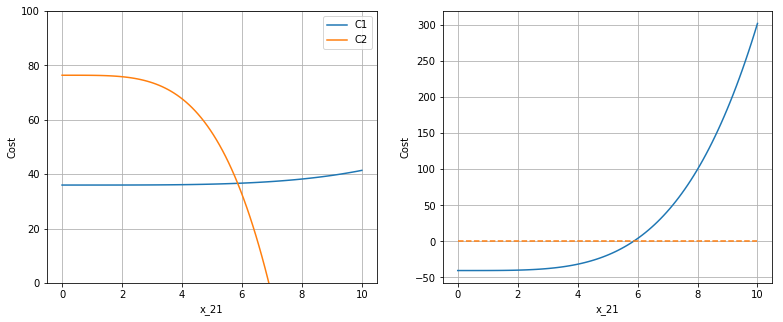

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_21,C1,label=("C1"))
plt.plot(x_21,C2,label=("C2"))
plt.xlabel("x_21")
plt.ylabel("Cost")
plt.ylim([0,100])
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_21,KK,label="Total Cost")
plt.plot(x_21,np.ones(x_21.shape)*0,'--')
plt.xlabel("x_21")
plt.ylabel("Cost")
plt.grid(True)


Plot for illustration

In [16]:
C_T=BPR_int_val(phi_list[1],x_21,k_list[1])+BPR_int_val(phi_list[5],x_21,k_list[5])-INVERSE_DEMAND_SHIFT*x_21

Text(0, 0.5, 'Integral Cost')

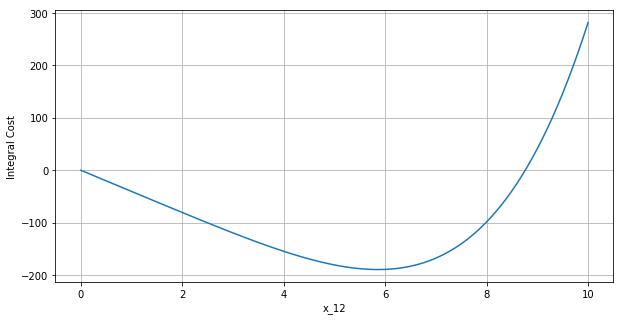

In [17]:
plt.figure(figsize=(10,5))
plt.plot(x_21,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

Compute the optimum with cvxpy

In [18]:
x_21=cp.Variable()
constraints=[x_21>=0,x_21<=10]

C_T=BPR_int(phi_list[1],x_21,k_list[1])+BPR_int(phi_list[5],x_21,k_list[5])-INVERSE_DEMAND_SHIFT*x_21
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value:", x_21.value)

optimal
optimal flow value: 5.858557487311528


### Expected solution

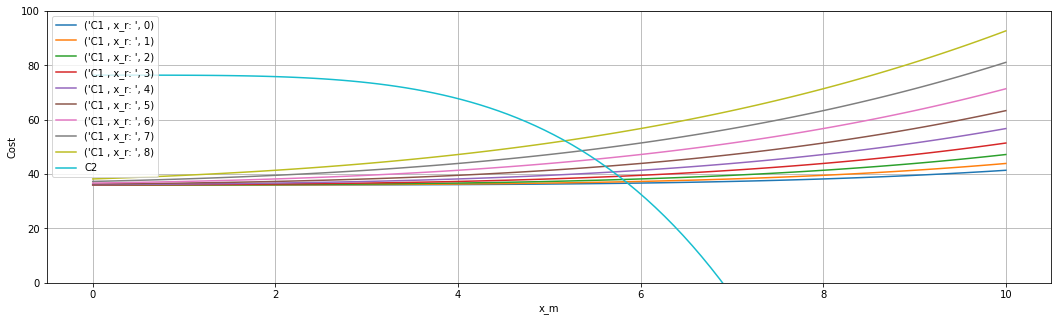

In [19]:
eq=8.64

plt.figure(figsize=(18,5))
x_21=np.linspace(0,N,100)
x_r=[0,1,2,3,4,5,6,7,8]
for x_ in x_r:
    x_m=np.linspace(0,N,100)
    C1=BPR(phi_list[1],x_m+x_,k_list[1])
    plt.plot(x_m,C1,label=("C1 , x_r: ", x_))
    
C2=-BPR(phi_list[5],x_21,k_list[5])+INVERSE_DEMAND_SHIFT
plt.plot(x_21,C2,label=("C2"))
plt.xlabel("x_m")
plt.ylabel("Cost")
plt.ylim([0,100])
plt.grid(True)
plt.legend()

## Run

### Init Graph

I am going to change the structure of the OD dict a little. As we want to update both the upper and lower bound (which should definitely not stay zero. 

In [364]:
OD=dict()
N=10
OD['1','2_p']=N
OD['2','1_p']=N

In [365]:
G=nx.DiGraph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)

In [366]:
G=initEdgeAttr(G,edge_list,k_list,phi_list,is_negative)
G=initNodeAttr(G,nodes_pots)
G=update_costs(G,INVERSE_DEMAND_SHIFT)

#Create a feasible solution for the passengers
G=init_flows(G,OD) 

# for e in G.edges():
#     print(e," --- ",G.edges[e])

G=update_costs(G,INVERSE_DEMAND_SHIFT)

dummy_nodes=dict()
dummy_nodes['2_p']='2'
dummy_nodes['1_p']='1'

### Run

For line search, many steps are optimal inaccurate: maybe this is the reason for it not to make progress

With line search, the smoothing seems to work very slow and prevent a fast update of the ri... for some reason. It is not only with line search. It is just that the update rule for ri is not great for a quickly decreasing alpha

In [367]:
G_k,y_list,opt_res,OD_list=modified_FW(G,OD,edge_list,dummy_nodes,maxIter=400,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=True)

In [369]:
print_final_flows(G_k)

('1', '2')  :  8.580851910701742
('1', 'R')  :  2.6979991744935394
('1', '2_p')  :  0.274627617377382
('1', '1_p')  :  5.732211017500027
('2', '1')  :  8.430210191993567
('2', '2_p')  :  8.580851910701742
('2', '1_p')  :  0.3181482746977282
('2', 'R')  :  0.013419137813454551


In [370]:
print_final_cost(G_k)

('1', '2')  :  38.908493925540014
('1', 'R')  :  40.81139324755813
('1', '2_p')  :  90.0
('1', '1_p')  :  51.525758103518676
('2', '1')  :  38.80271154109845
('2', '2_p')  :  49.50733241407424
('2', '1_p')  :  90.0
('2', 'R')  :  10000000000000000000000


In [371]:
sanity_check_N(G_k)

1 to 2:  8.855479528079124
2 to 1:  6.050359292197755


In [372]:
OD_list[-1]

{('1', '2_p'): 9.9790801495538,
 ('2', '1_p'): 6.979655680496466,
 ('1', 'R'): 0,
 ('2', 'R'): 2.7769786372475265,
 ('2_p', 'R'): 0,
 ('1_p', 'R'): 0}

In [374]:
sanity_check_cost(G_k)

1 to 2:  90.0  =====  88.41582633961426
2 to 1:  90.0  =====  90.32846964461713


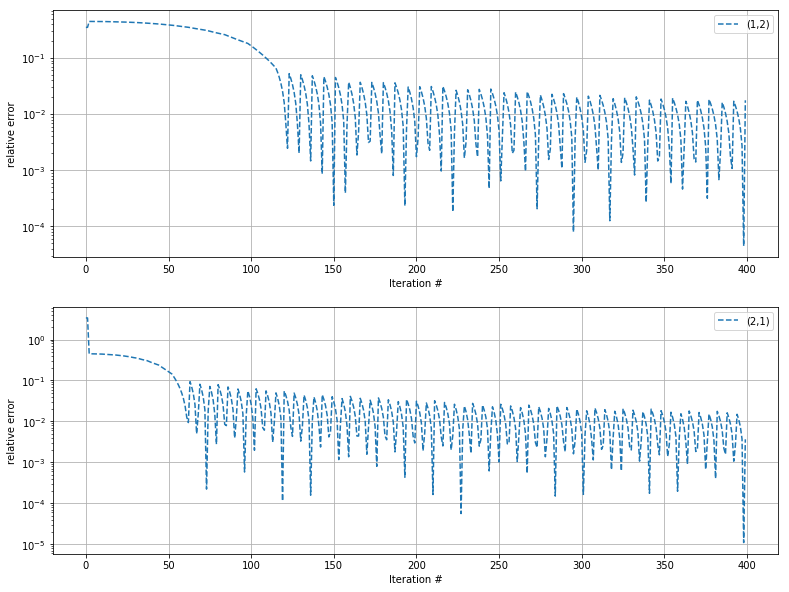

In [375]:
plot_errors(G_k,'log',dots=False,lims=None)

### Analyze output

In [376]:
#plot also the theoretical lines (what should the result be, theoretically?)

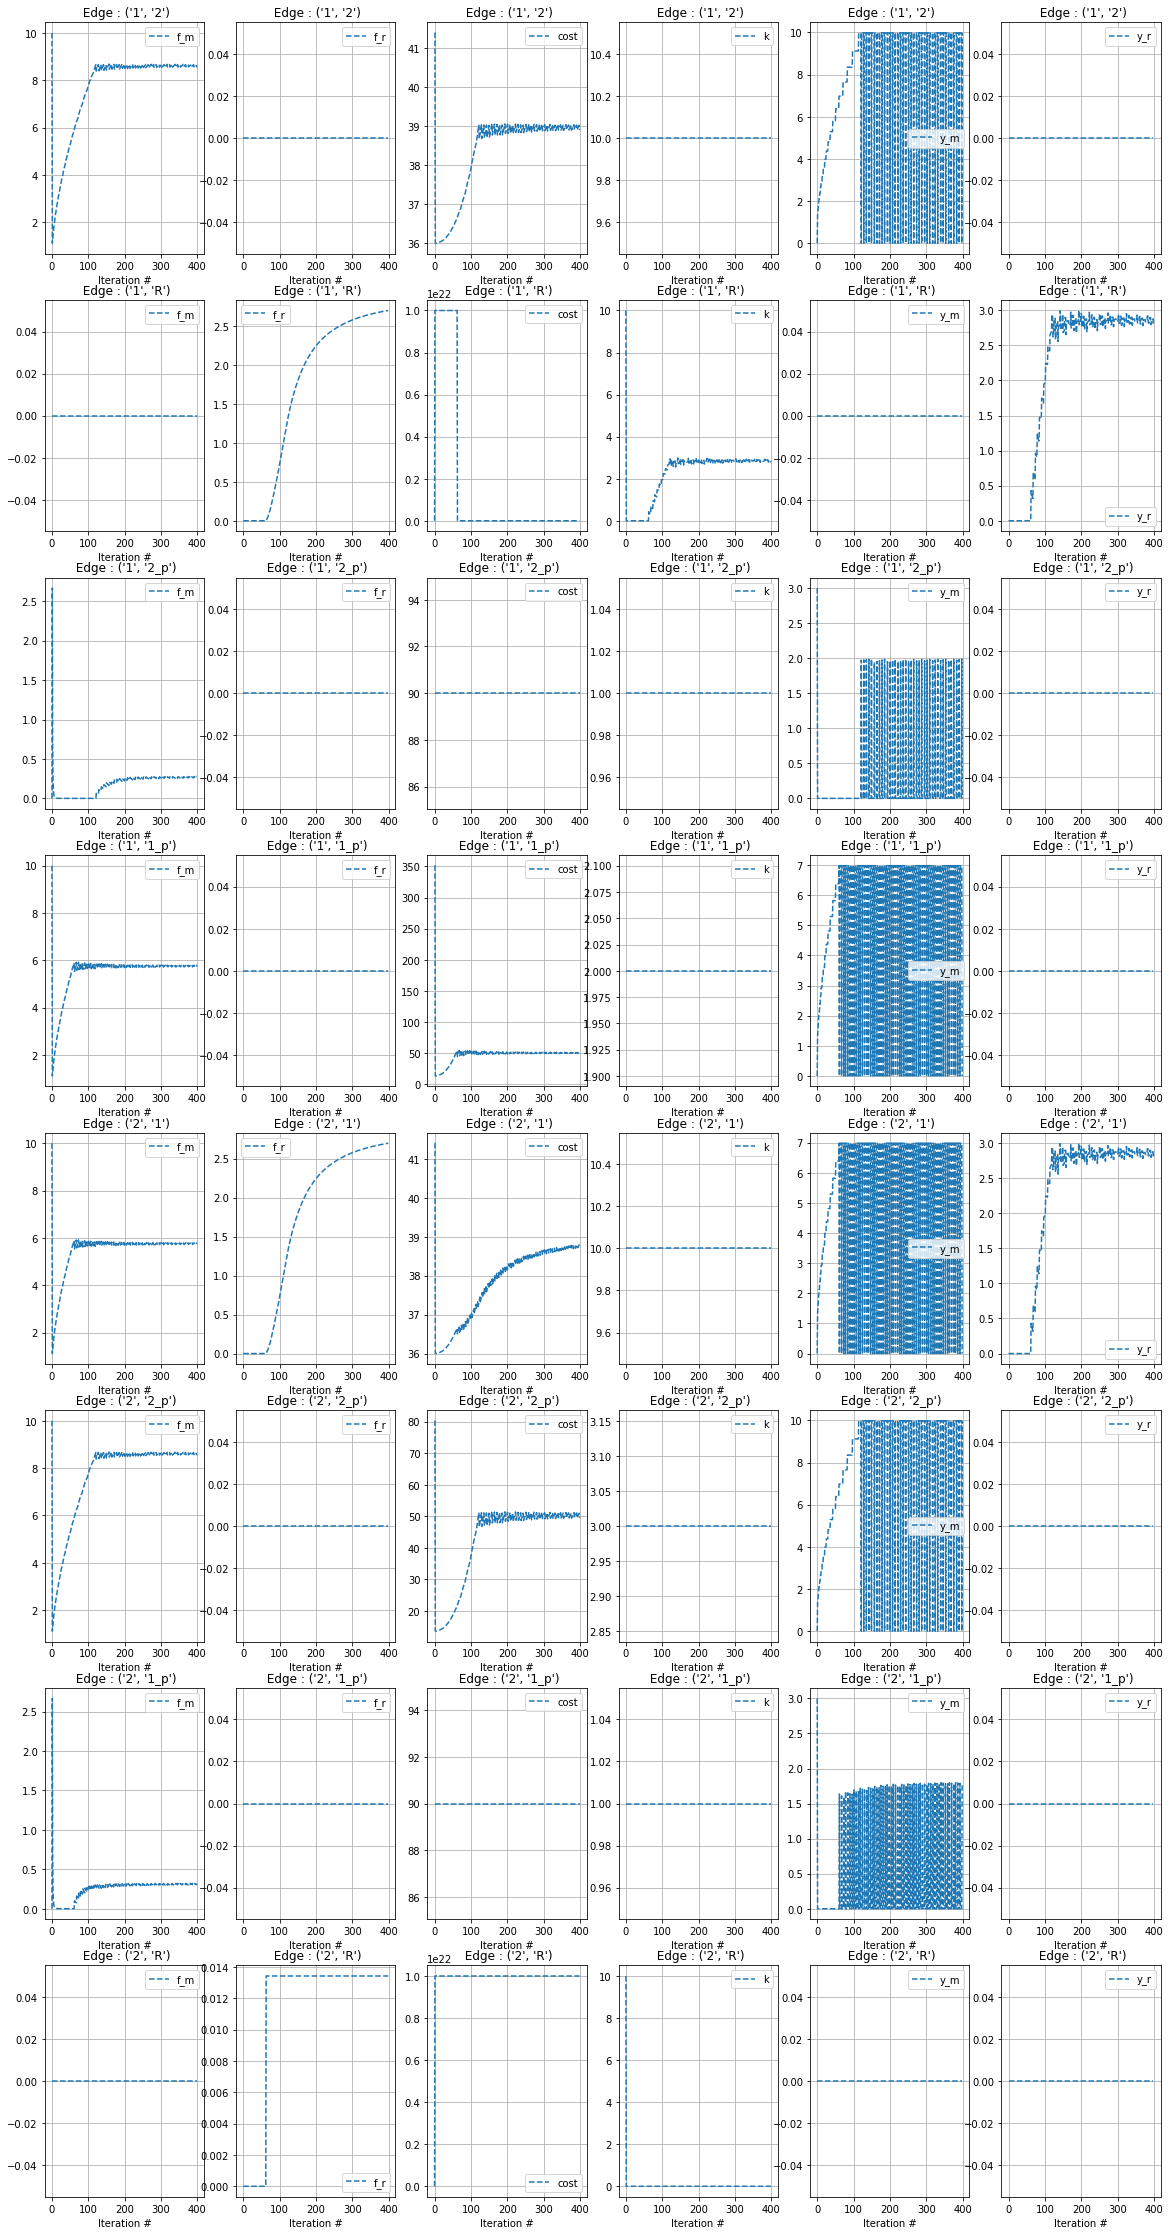

In [377]:
attrs=['f_m', 'f_r','cost','k', 'y_m','y_r']
# attrs=['f_m','f_r']
plot_edge_attrs(G_k,y_list,attrs,dots=False,lims=None)

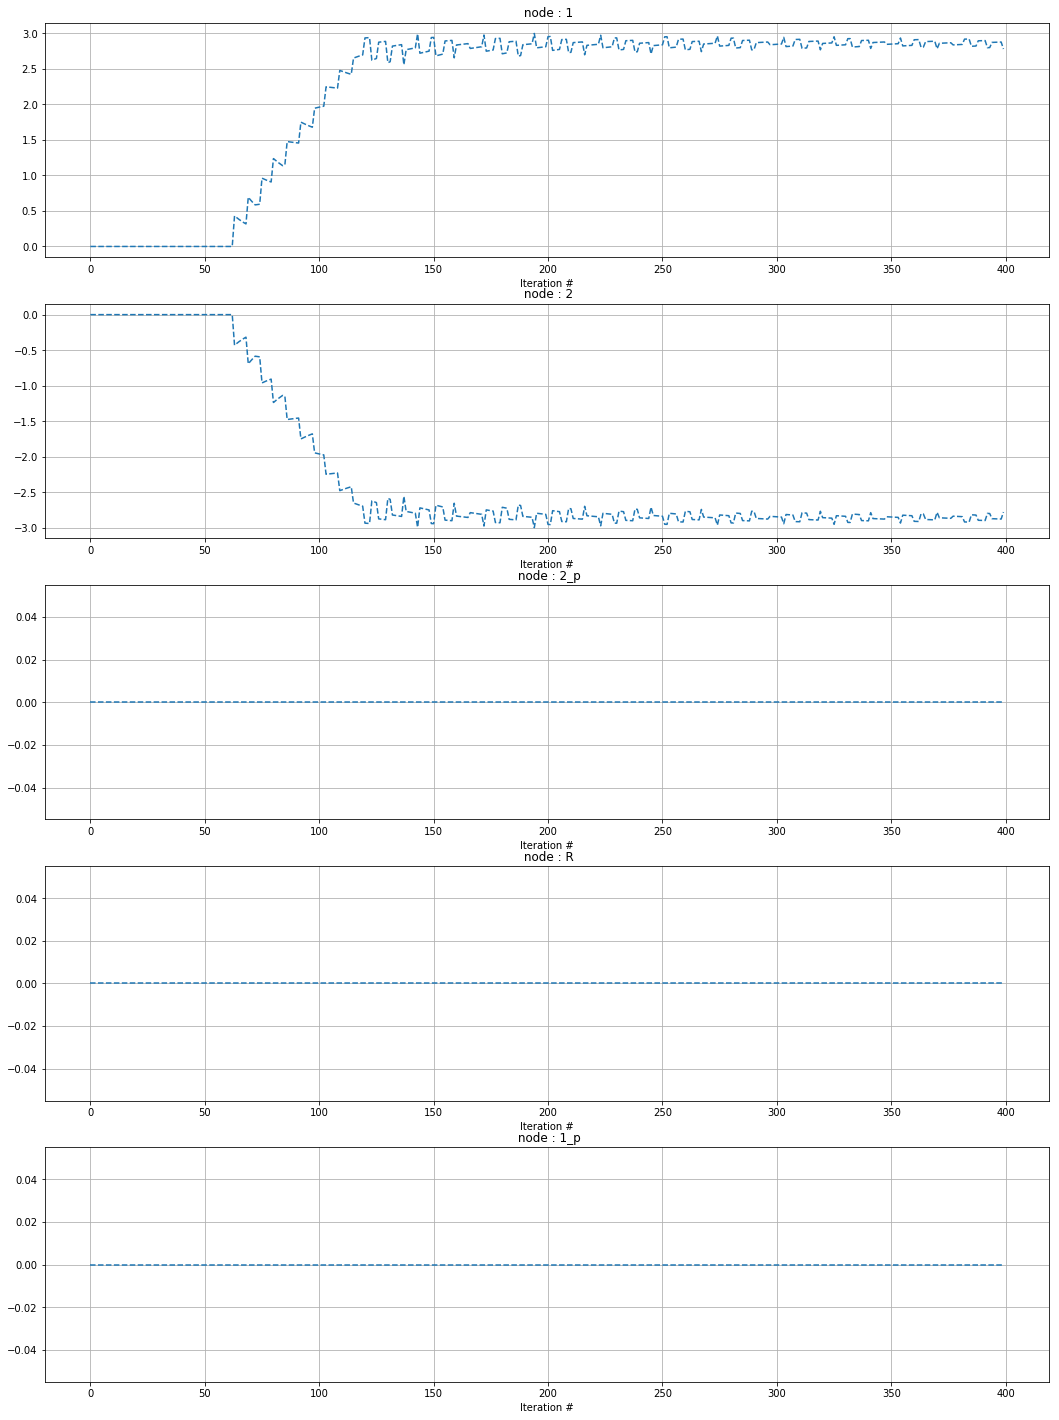

In [378]:
#this is equivalent to plotting the OD pairs at least for the rebalancers
plot_node_attrs(G_k,['ri'],lims=None)

The total cost increases logically, as it involves additional flow (rebalancing flow) that was not there in the beginning

Text(0.5, 0, 'iteration #')

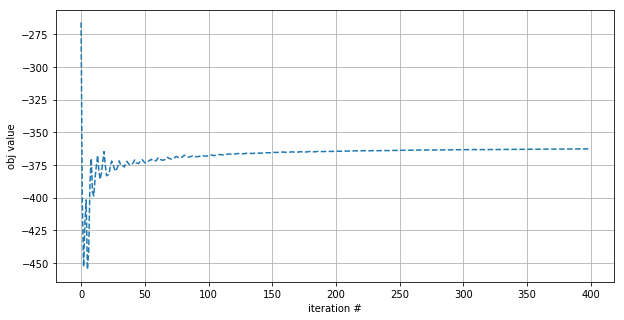

In [324]:
plt.figure(figsize=(10,5))
plt.plot(np.array(opt_res['obj']),'--')
plt.grid(True)
plt.ylabel("obj value")
plt.xlabel("iteration #")

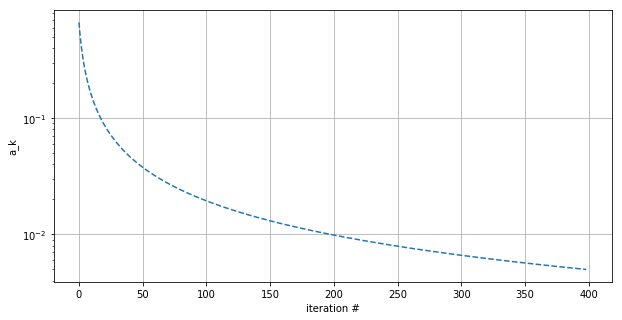

In [379]:
plt.figure(figsize=(10,5))
plt.plot(np.array(opt_res['a_k']),'--')
plt.grid(True)
plt.ylabel("a_k")
plt.xlabel("iteration #")
plt.yscale('log')

### oD

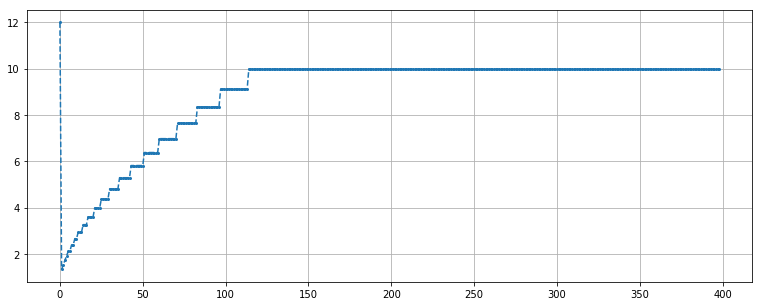

In [360]:
plot_OD(OD_list,'1','2_p')

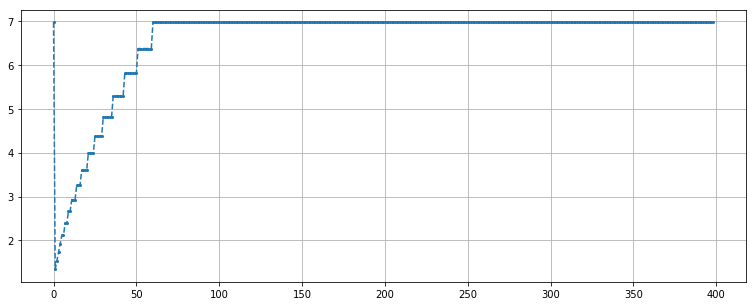

In [361]:
plot_OD(OD_list,'2','1_p')

# Understand the oscillations around 0

Why does the error keep oscillating while the assignments are nearly the same? 
The assignment barely budge after iteration 25, while this is when the error starts oscillating. 

In [299]:
lims=[300,400]

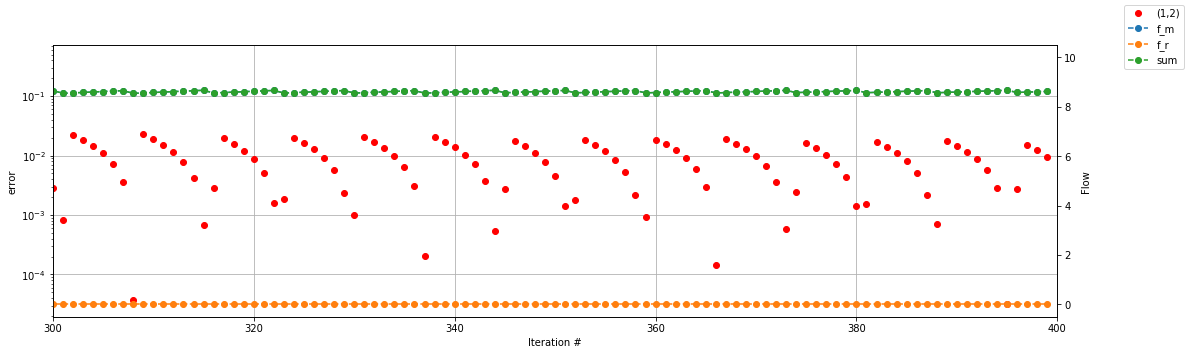

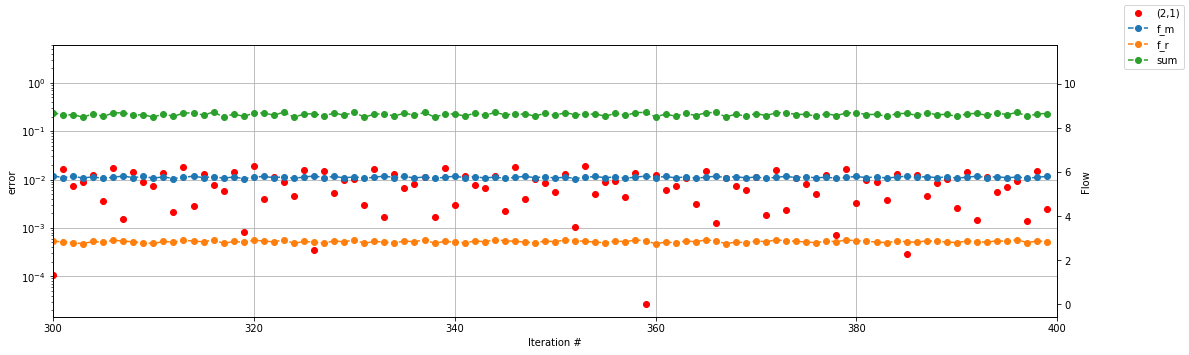

In [301]:
analyze_cost_oscillations(G_k,'1','2',lims,'log')

analyze_cost_oscillations(G_k,'2','1',lims,'log')

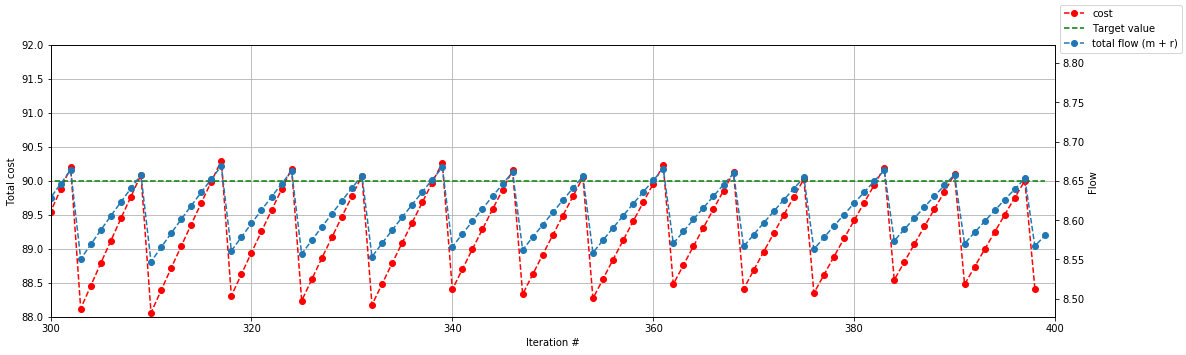

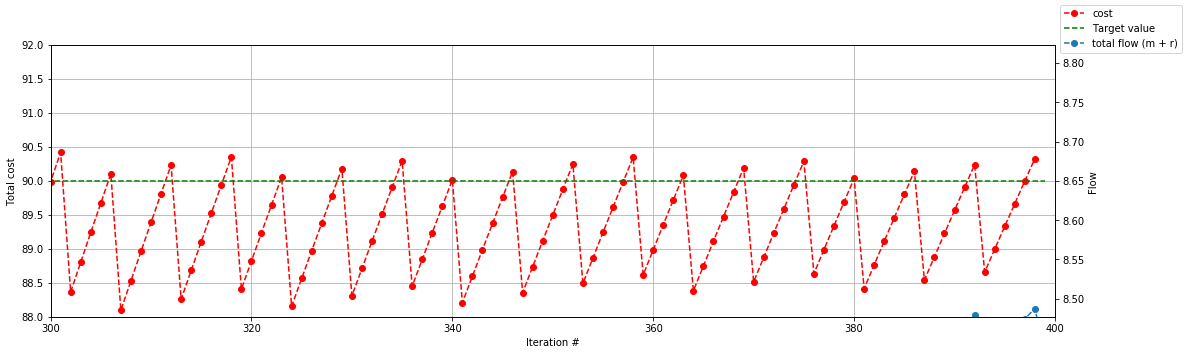

In [380]:
analyze_cost_oscillations_2(G_k,'1','2',lims)
analyze_cost_oscillations_2(G_k,'2','1',lims)

Black lines indicate that the assignment variable y_m is activated for the dummy edge
Black lines indicate that the assignment variable y_m is activated for the dummy edge


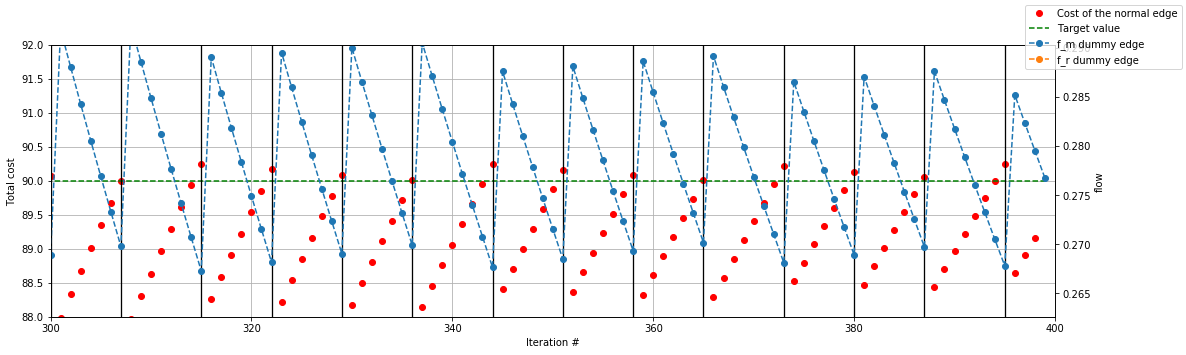

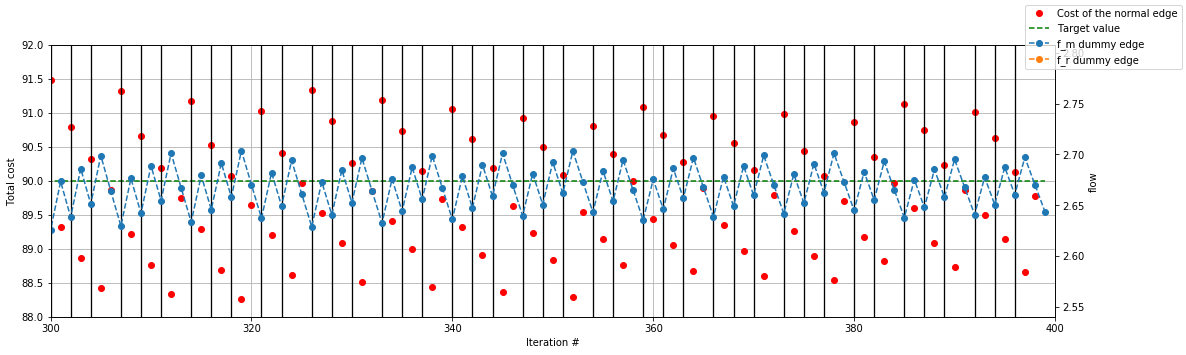

In [303]:
analyze_cost_oscillations_3(G_k,y_list,'1','2',lims)

analyze_cost_oscillations_3(G_k,y_list,'2','1',lims)

# LET US ANALYZE THE SIZE OF JUMPS IN FLOW ON THE DUMMY EDGE

You have to plot the size of oscillations as a function of the number of iterations, and for the different solving strategies you have (with/without smoothing and with/without evolving bounds)

## Dummy edge 1 2p

In [327]:
y_m=[]
for G in G_k:
    y_m.append(G['1']['2_p']['f_m'])
y_m=np.array(y_m)

In [328]:
diff_y_m=[]
for i in range(y_m.shape[0]-1):
    diff_y_m.append(y_m[i+1]-y_m[i])
diff_y_m=np.array(diff_y_m)

In [329]:
jumps=diff_y_m[diff_y_m>0]

In [330]:
len(jumps)

58

In [331]:
y_m.shape[0]/len(jumps)

6.896551724137931

one jump every 7 or 8 steps makes sense

Text(0, 0.5, 'jump relative size')

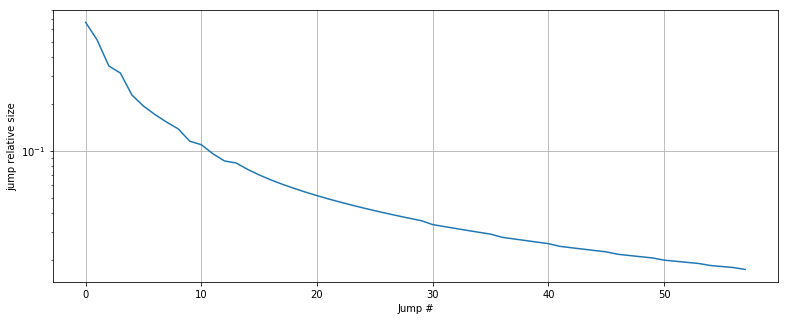

In [332]:
plt.figure(figsize=(13,5))
plt.plot(jumps)
plt.yscale('log')
plt.grid(True)
plt.xlabel("Jump #")
plt.ylabel("jump relative size")


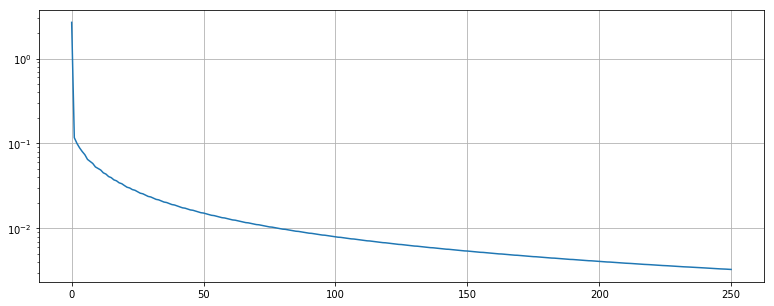

In [33]:
plt.figure(figsize=(13,5))
plt.plot(jumps)
plt.yscale('log')
plt.grid(True)



Previously, without evolving bounds: jumps are much bigger (1 oom)

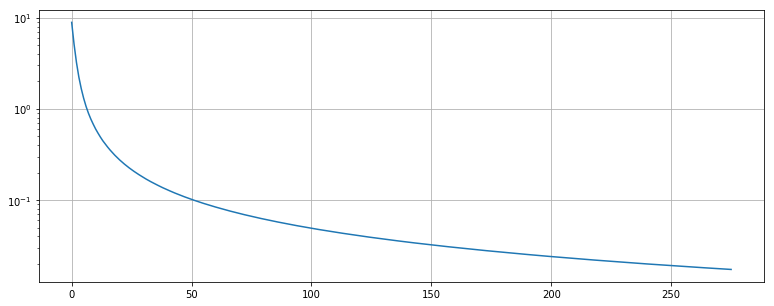

In [195]:
plt.figure(figsize=(13,5))
plt.plot(jumps)
plt.yscale('log')
plt.grid(True)



The size of jumps is directly correlated with alpha. Why? Simply because here we do not run line search, and whenever we have an assignment on the dummy edge, it is updated as x_k+1 = (1-a) x_k + a y_k. As y_k is constant, we have a dependence pretty much linear with alpha. 

We see that the size of jumps is directly correlated with alpha, as expected. 
Therefore, two possiblities: either change alpha or change the size of the steps (we increase everytime by a significant amount, and that is not efficient) 
There are clues in Gardner paper in order to make the bound updating

Just like in Gartner paper: he was saying if we update the size of the steps (i.e. the upper bounds and lower bounds on potential demand, we reach the optimum much faster). 
This also eliminates the need for line search, which is pretty positive. 